# Clustering

* Uses unlabeled data and looks for similarities between groups
* There is no knowledge of the true correct labels
* Differt methods can be used to determine the number of clusters

**Main ideas:**
* Using features to decide which points are most similar to other points.
* There is no correct y label for comparison.
* Process to "discover" potential labels.

**How do we assign a new data point?**
* Use features to assign the most appropriate

**Could we use the found clusters to create labels?**
* Yes, we can use unsupervised learning and supervised learning later.
    * There's still no way of knowing if the found clusters are correct
    
**Further questions:**
* How to decide the number of clusters?
* Should we or the algorithm decide?
* How to measure the fit?

# K-Means Clustering

Properties:
* Each point must belong to a cluster.
* Each point can only belong to **one** cluster.

To keep in mind:
* How to choose a value for k.
* Can we evaluate how good our current k is at determining clusters?

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Either research the topic or have a domain expert explain the features to you

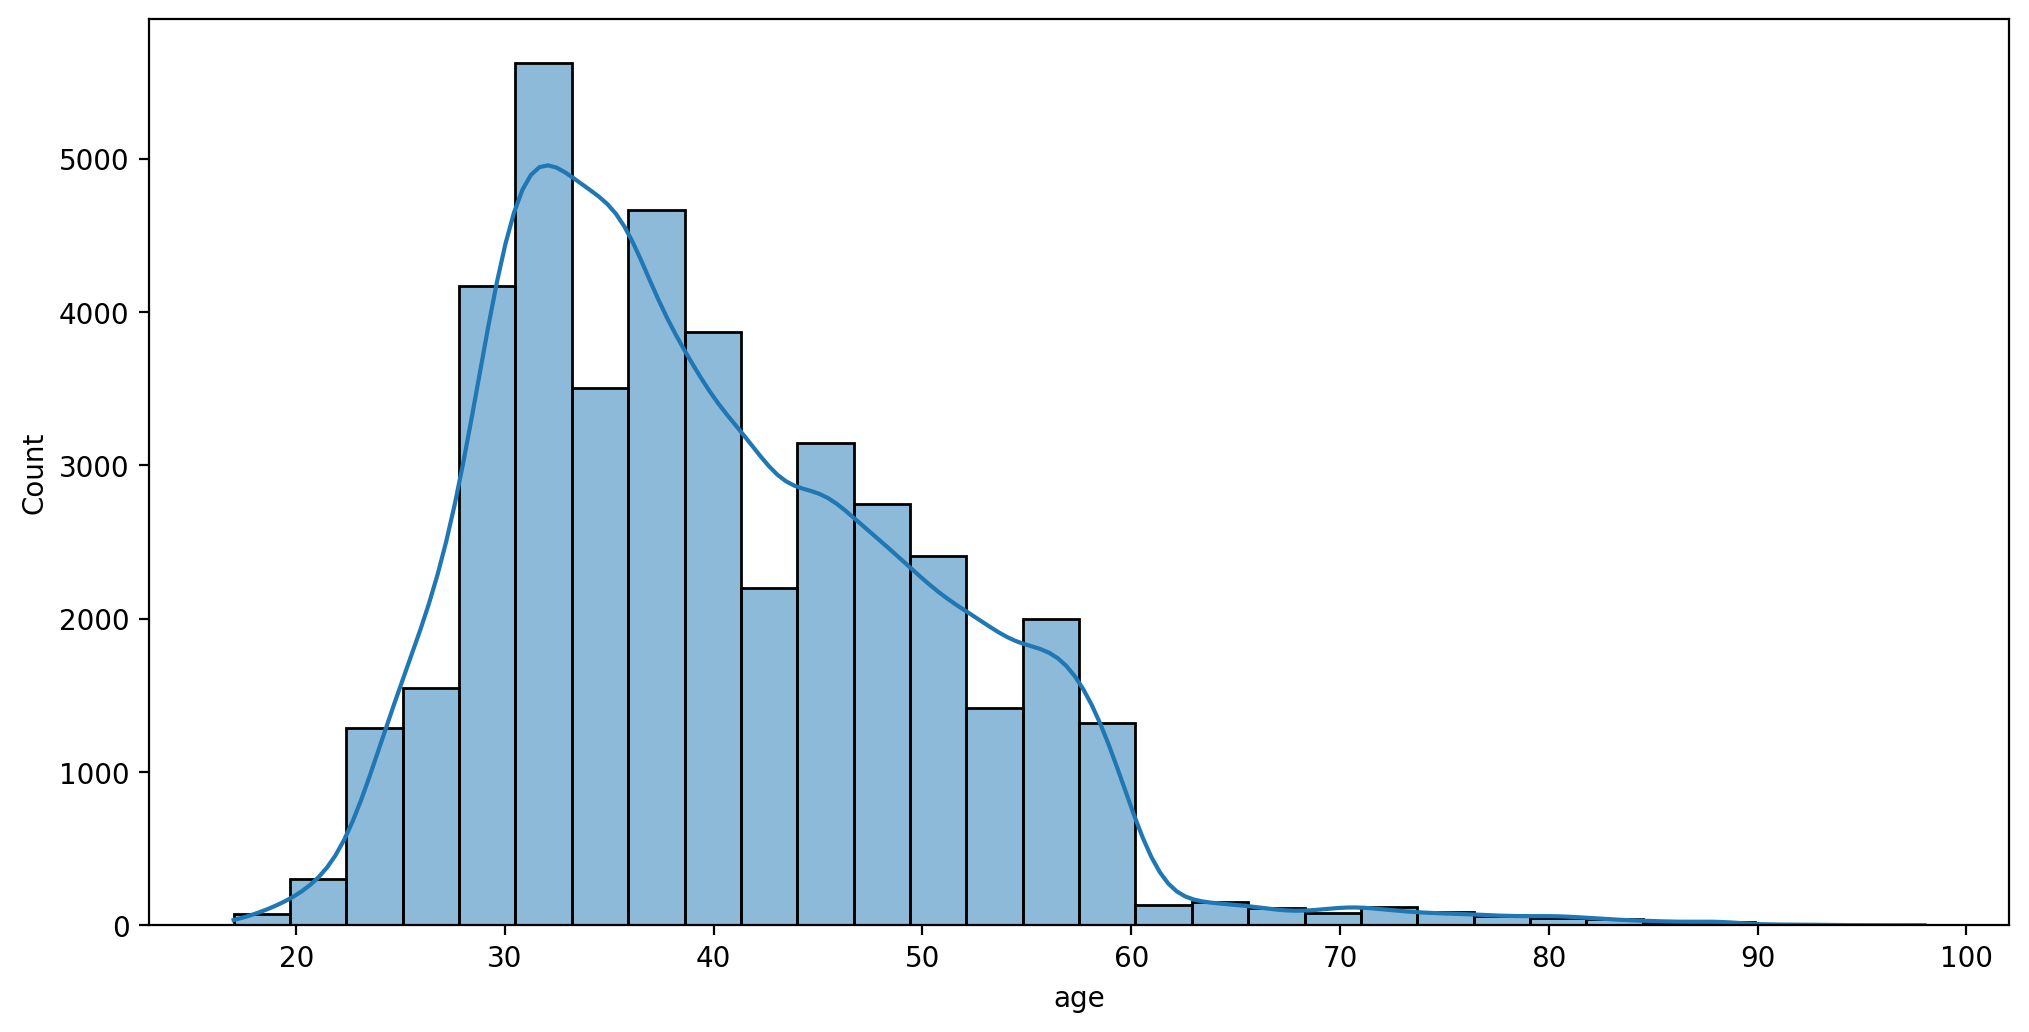

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x="age", bins=30, kde=True);

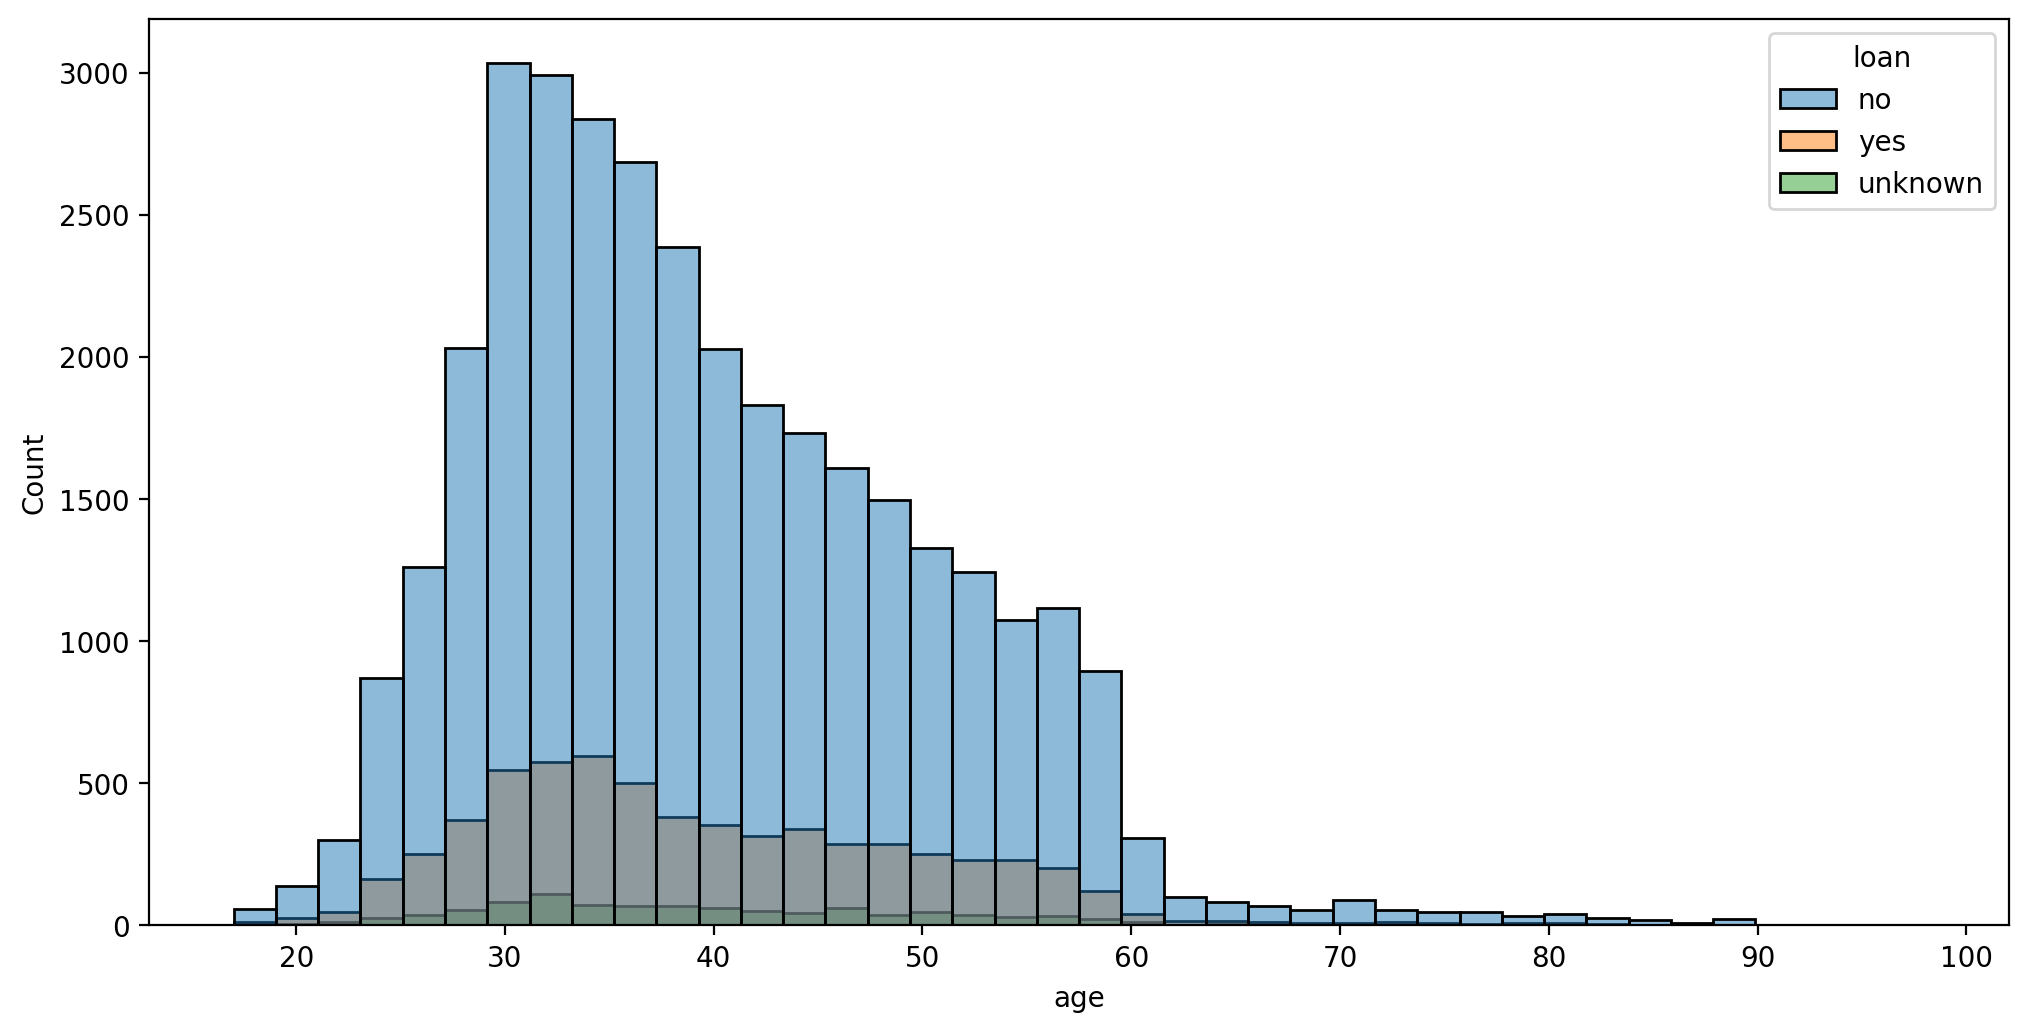

In [12]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x="age", bins=40, hue="loan");

It could make sense to filter out the people who already have loans and just focus on the people that don't.

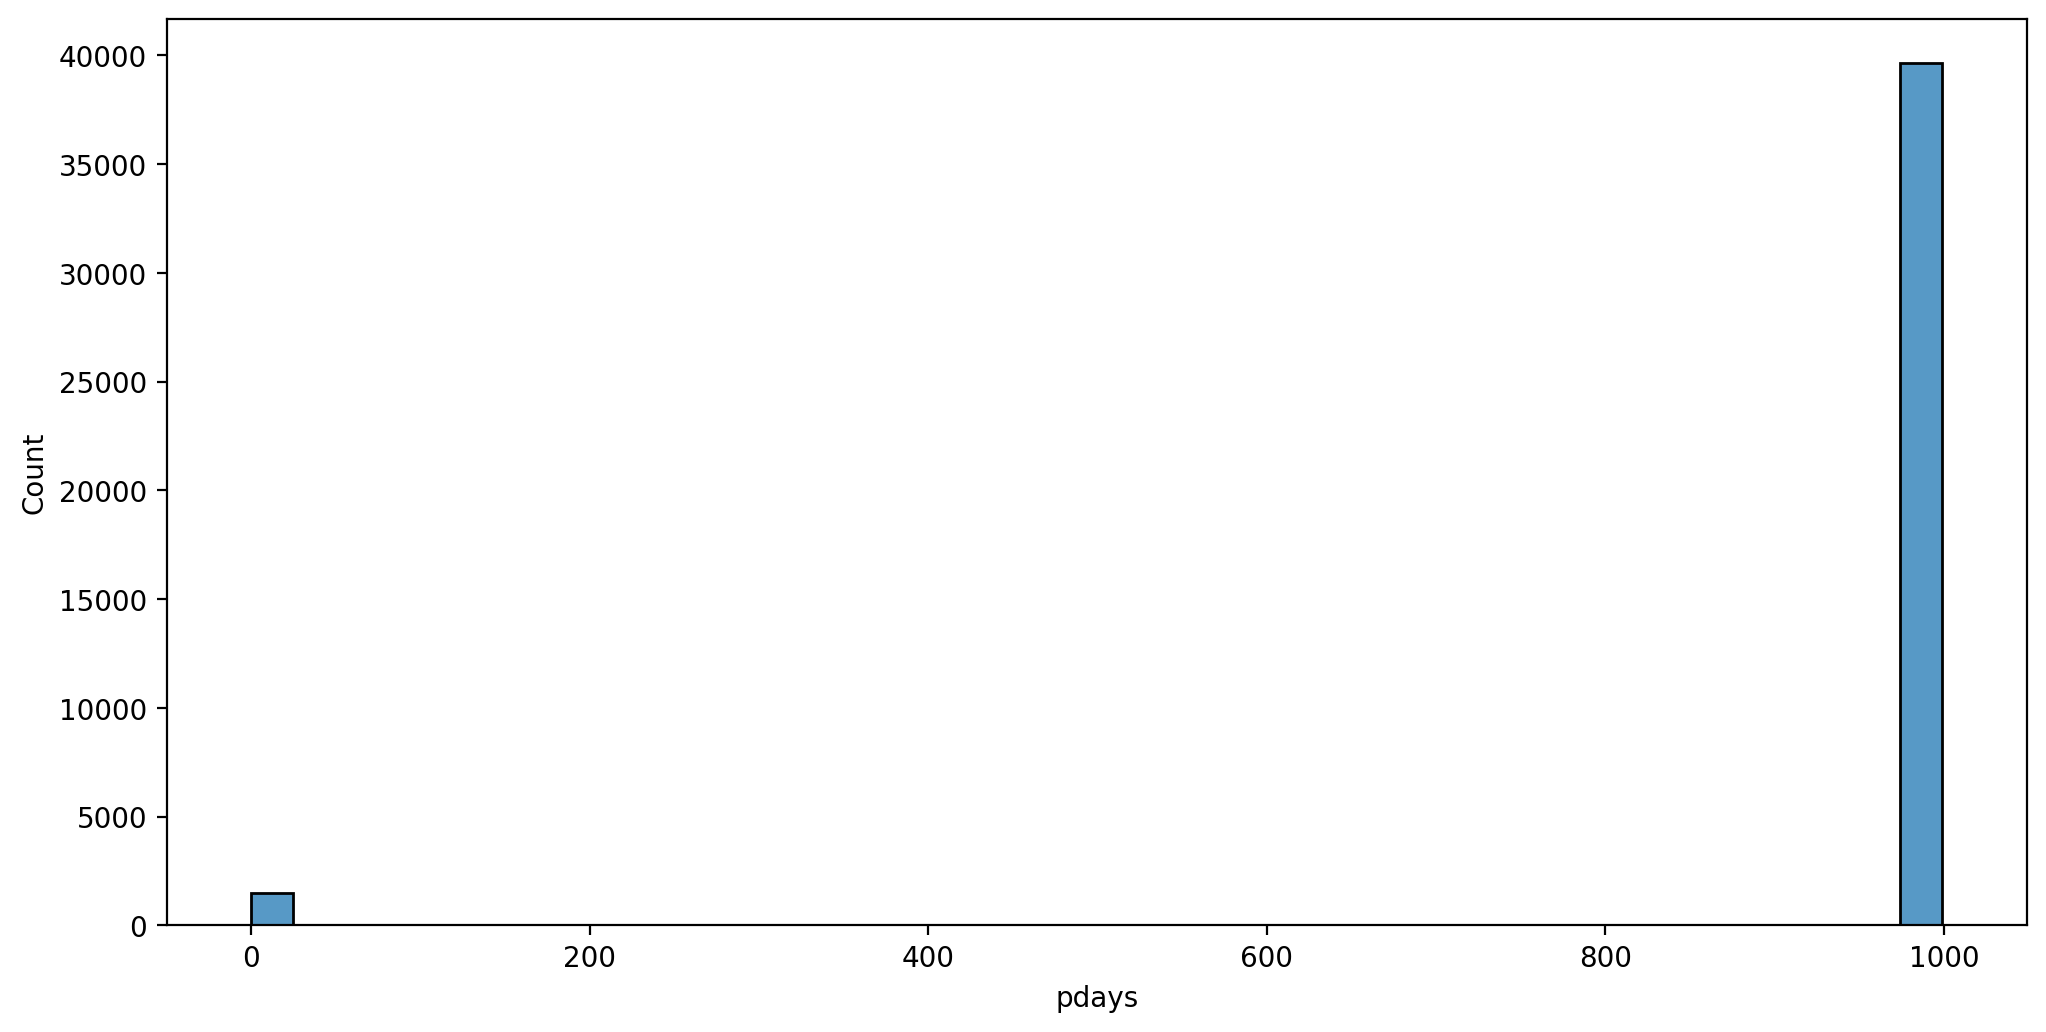

In [13]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x="pdays", bins=40);

The "999" is a filler for people that haven't been contacted. We should filter these out, however the great majority has not been contacted.

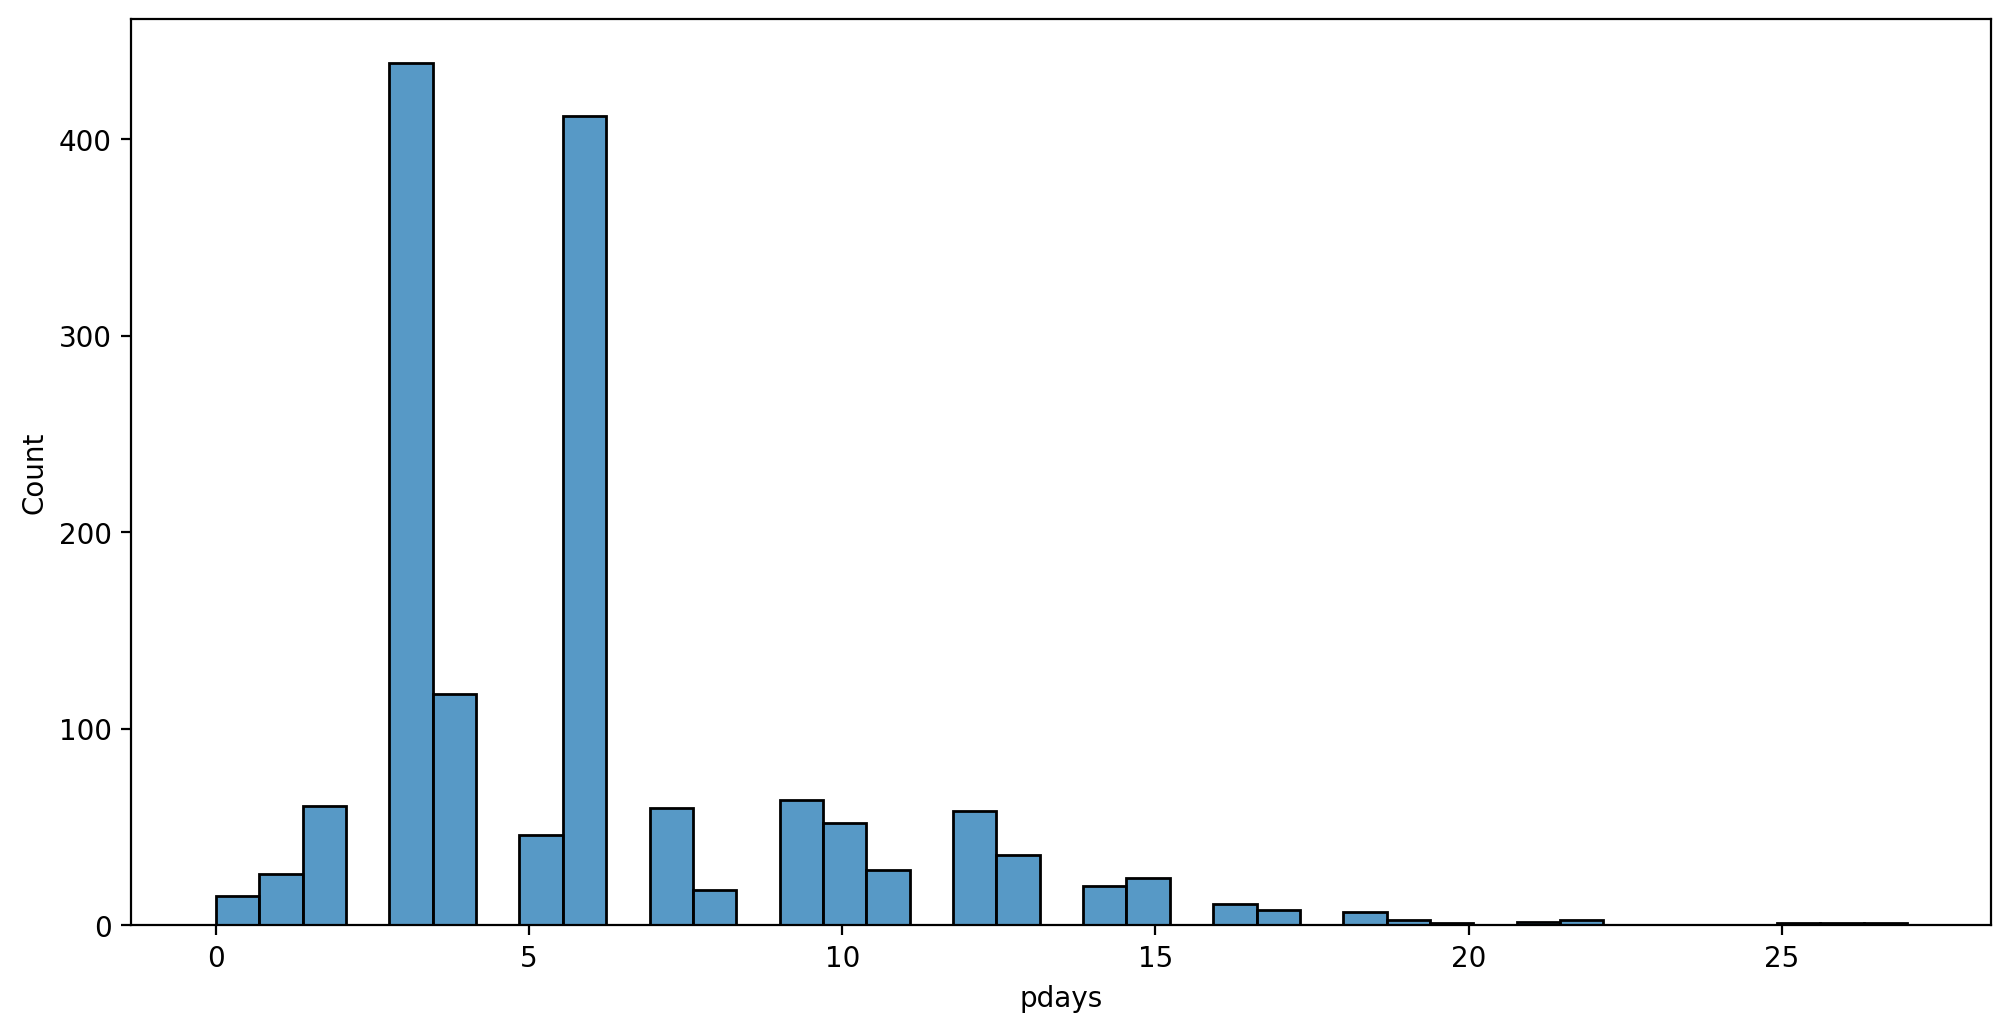

In [16]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df["pdays"] != 999], x="pdays");

In [17]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [19]:
# seconds
df["duration"].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

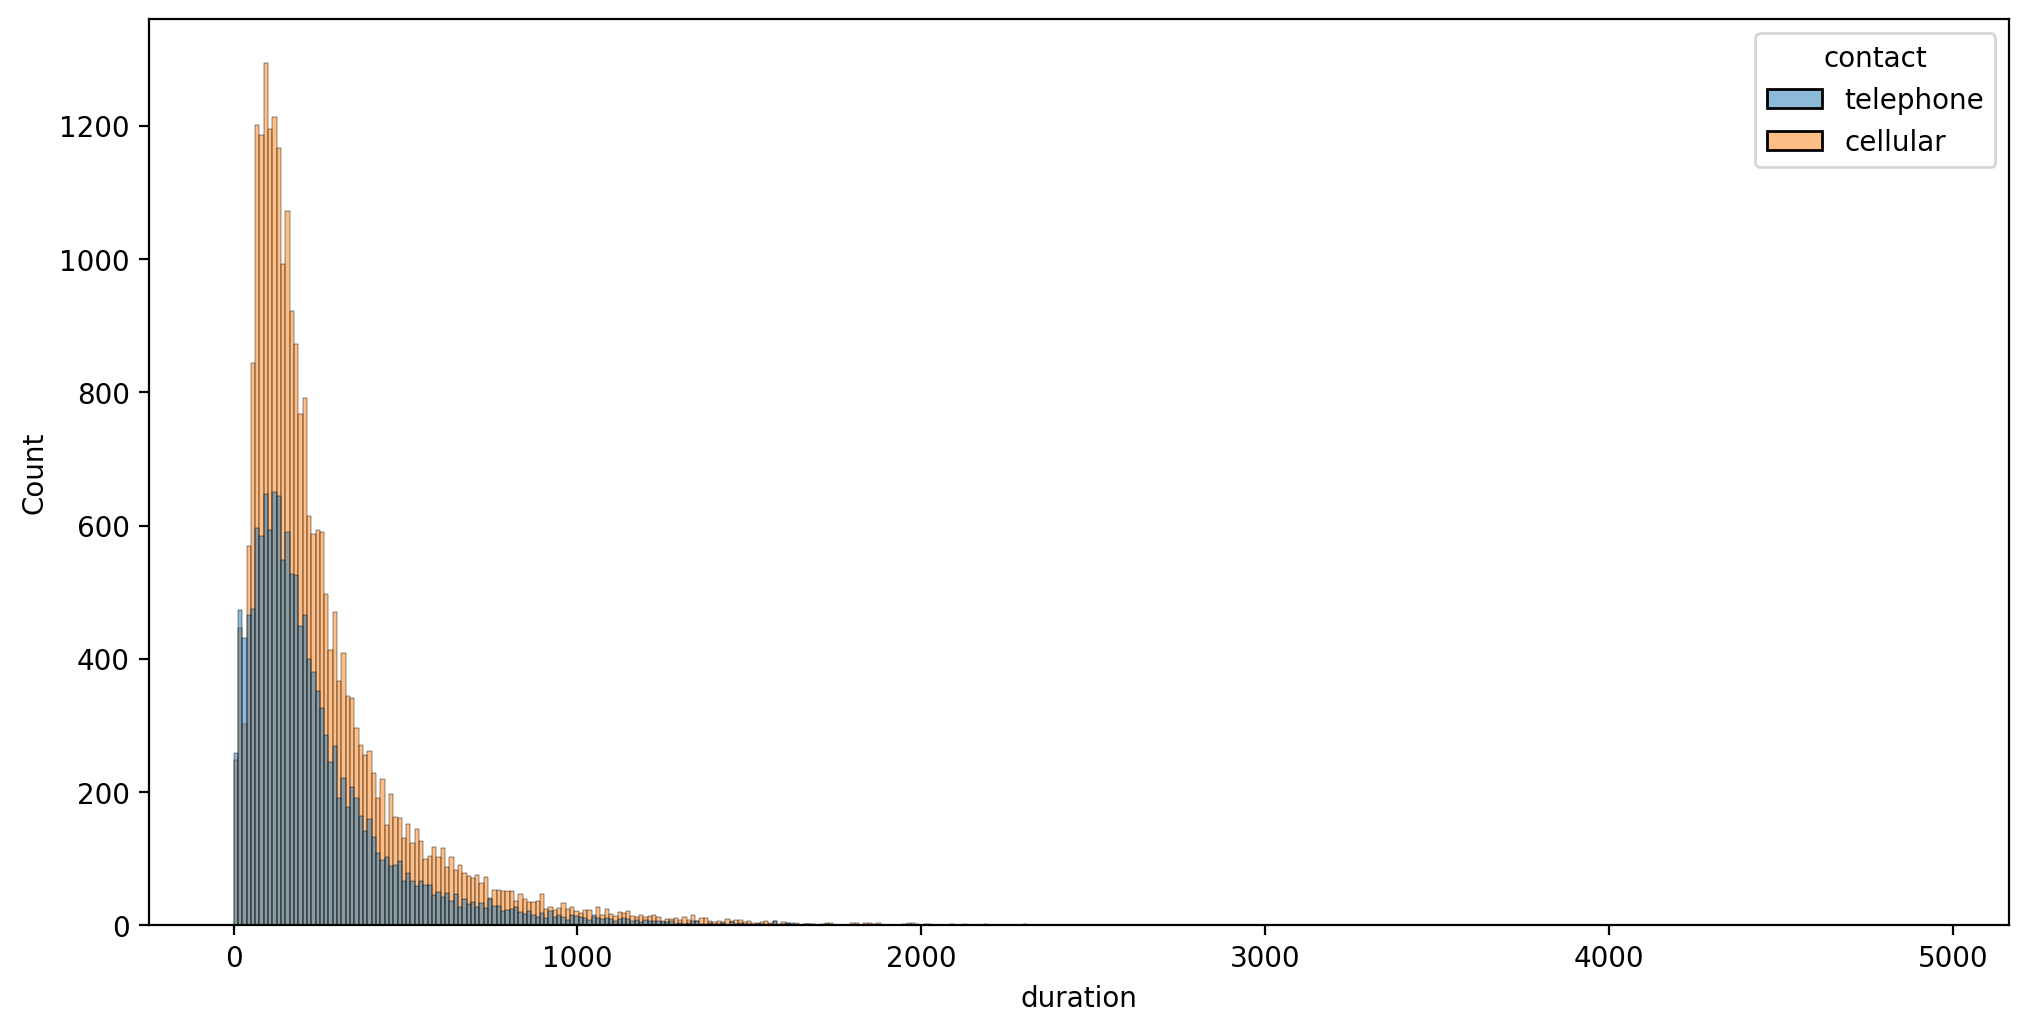

In [21]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x="duration", hue="contact");

The behaviours look similar, however, we can see that cellular conctacts are more frequent. It looks like the duration of the calls don't depend on the type of contact.

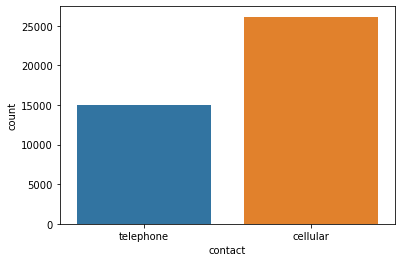

In [23]:
sns.countplot(data=df, x="contact");

In [27]:
df["job"].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

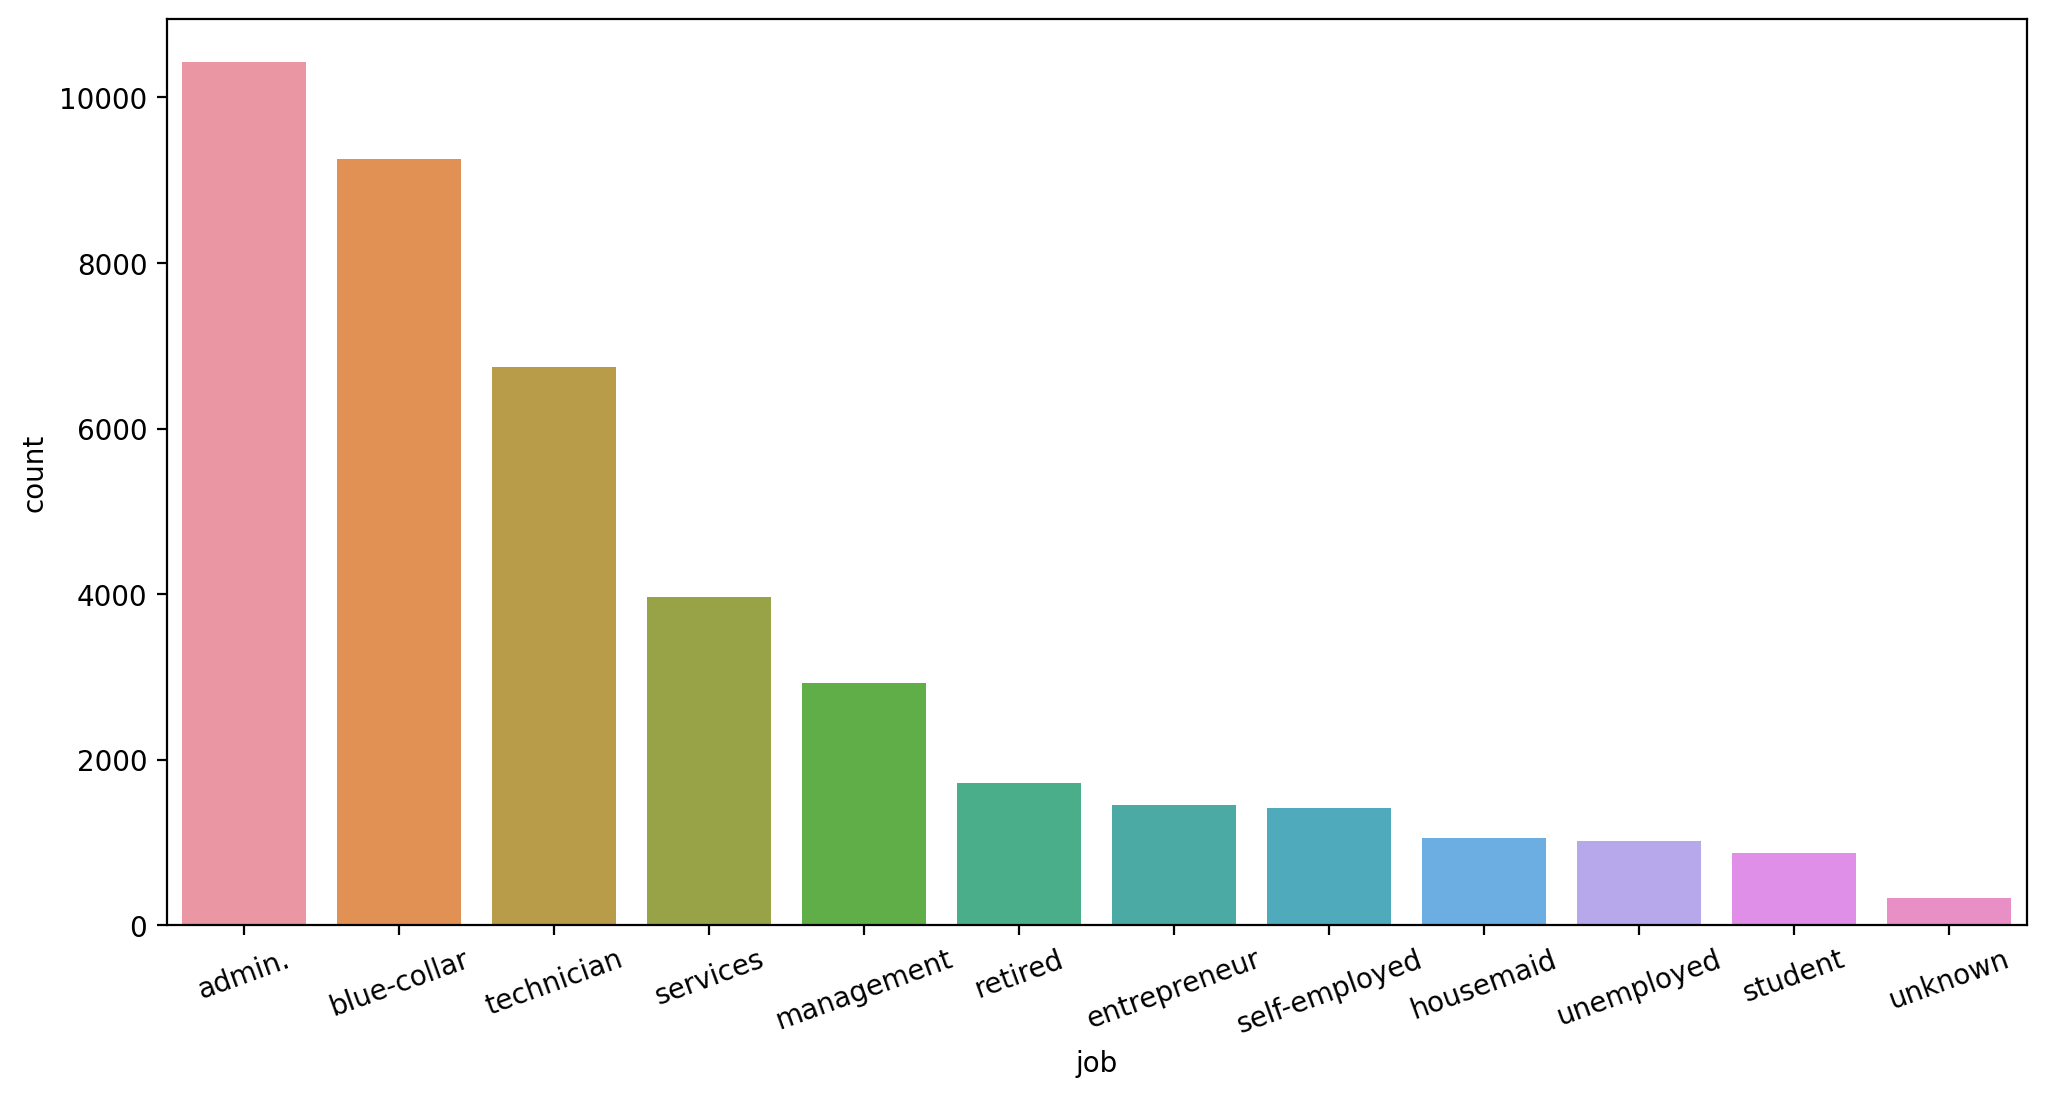

In [28]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x="job", order=df["job"].value_counts().index) 
plt.xticks(rotation=20);

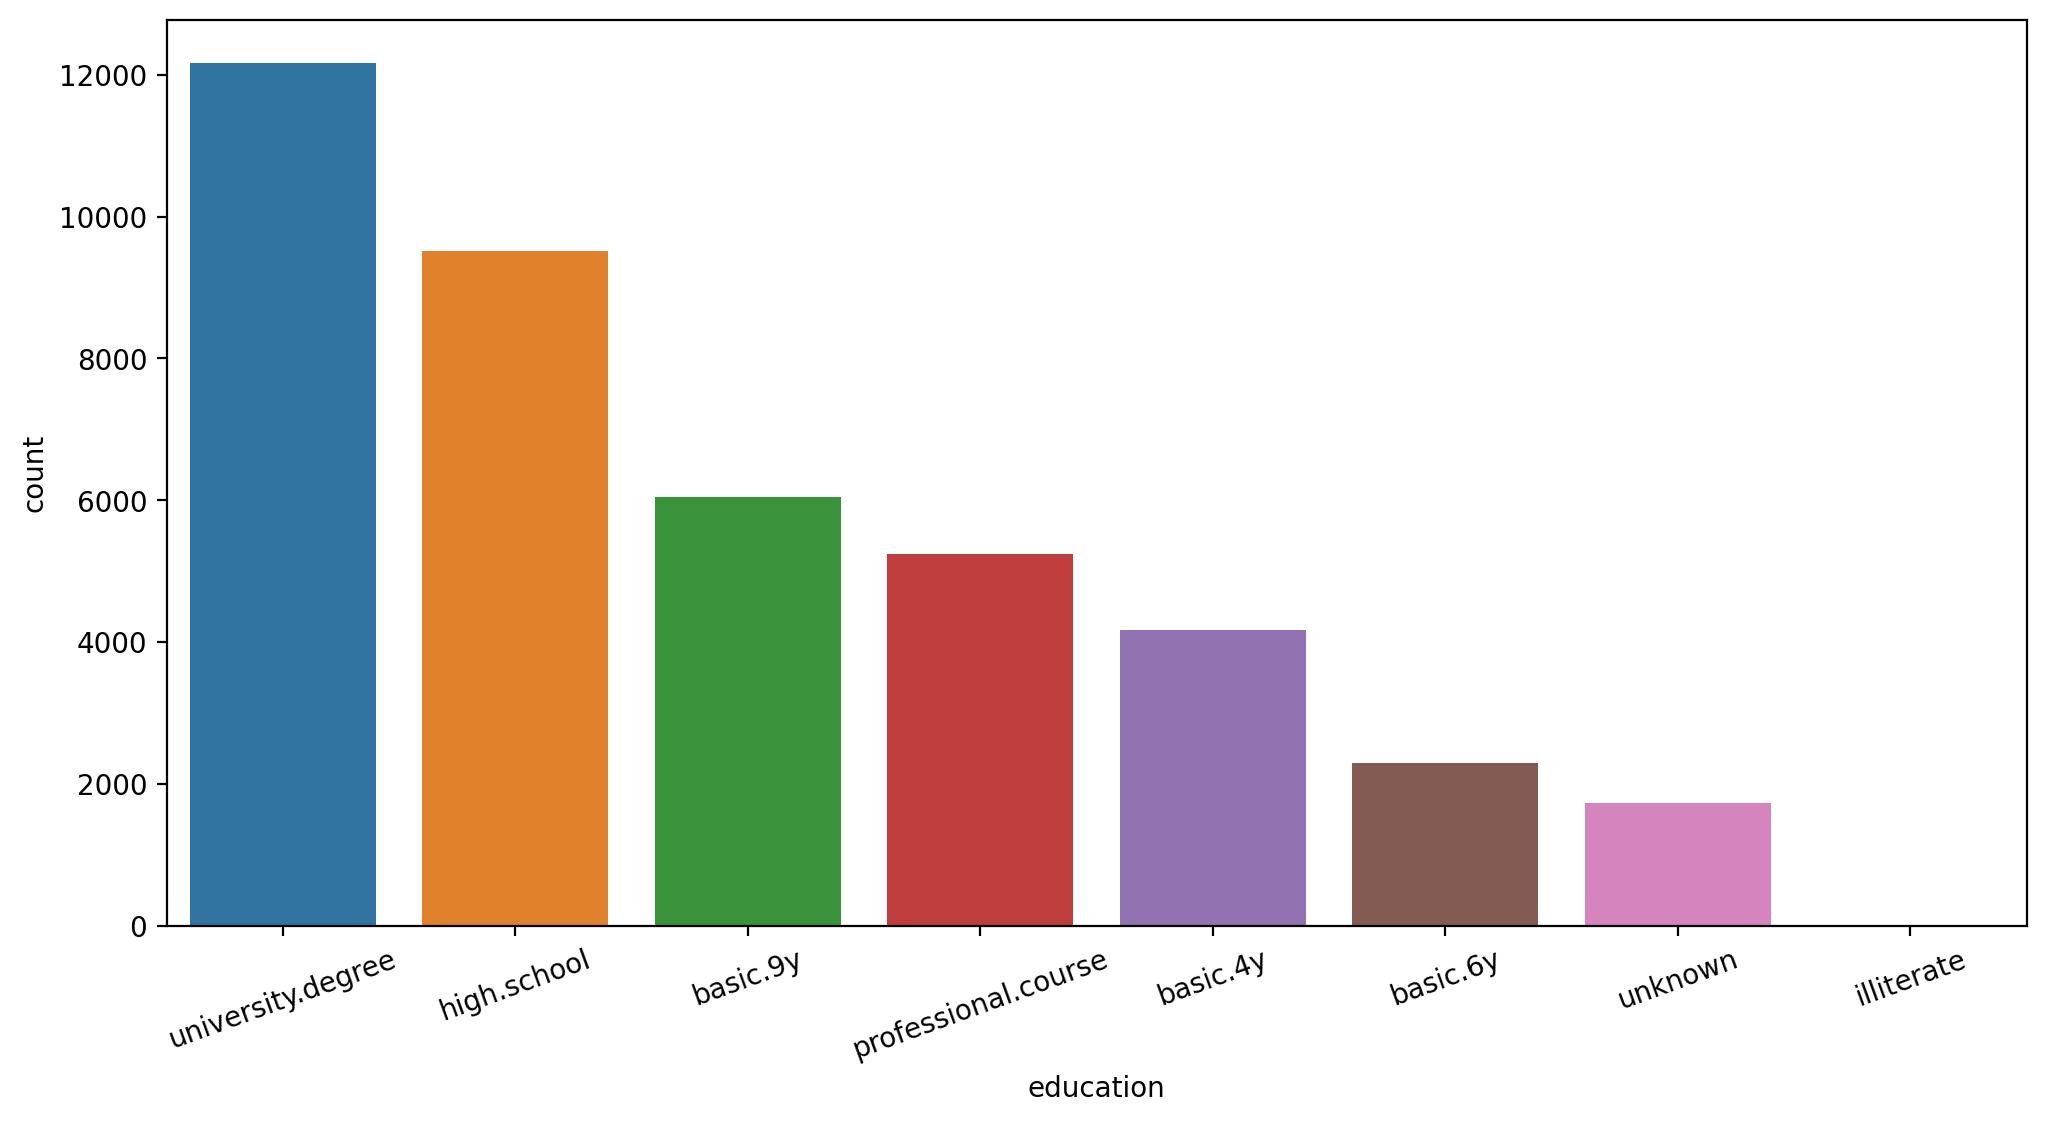

In [29]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x="education", order=df["education"].value_counts().index) 
plt.xticks(rotation=20);

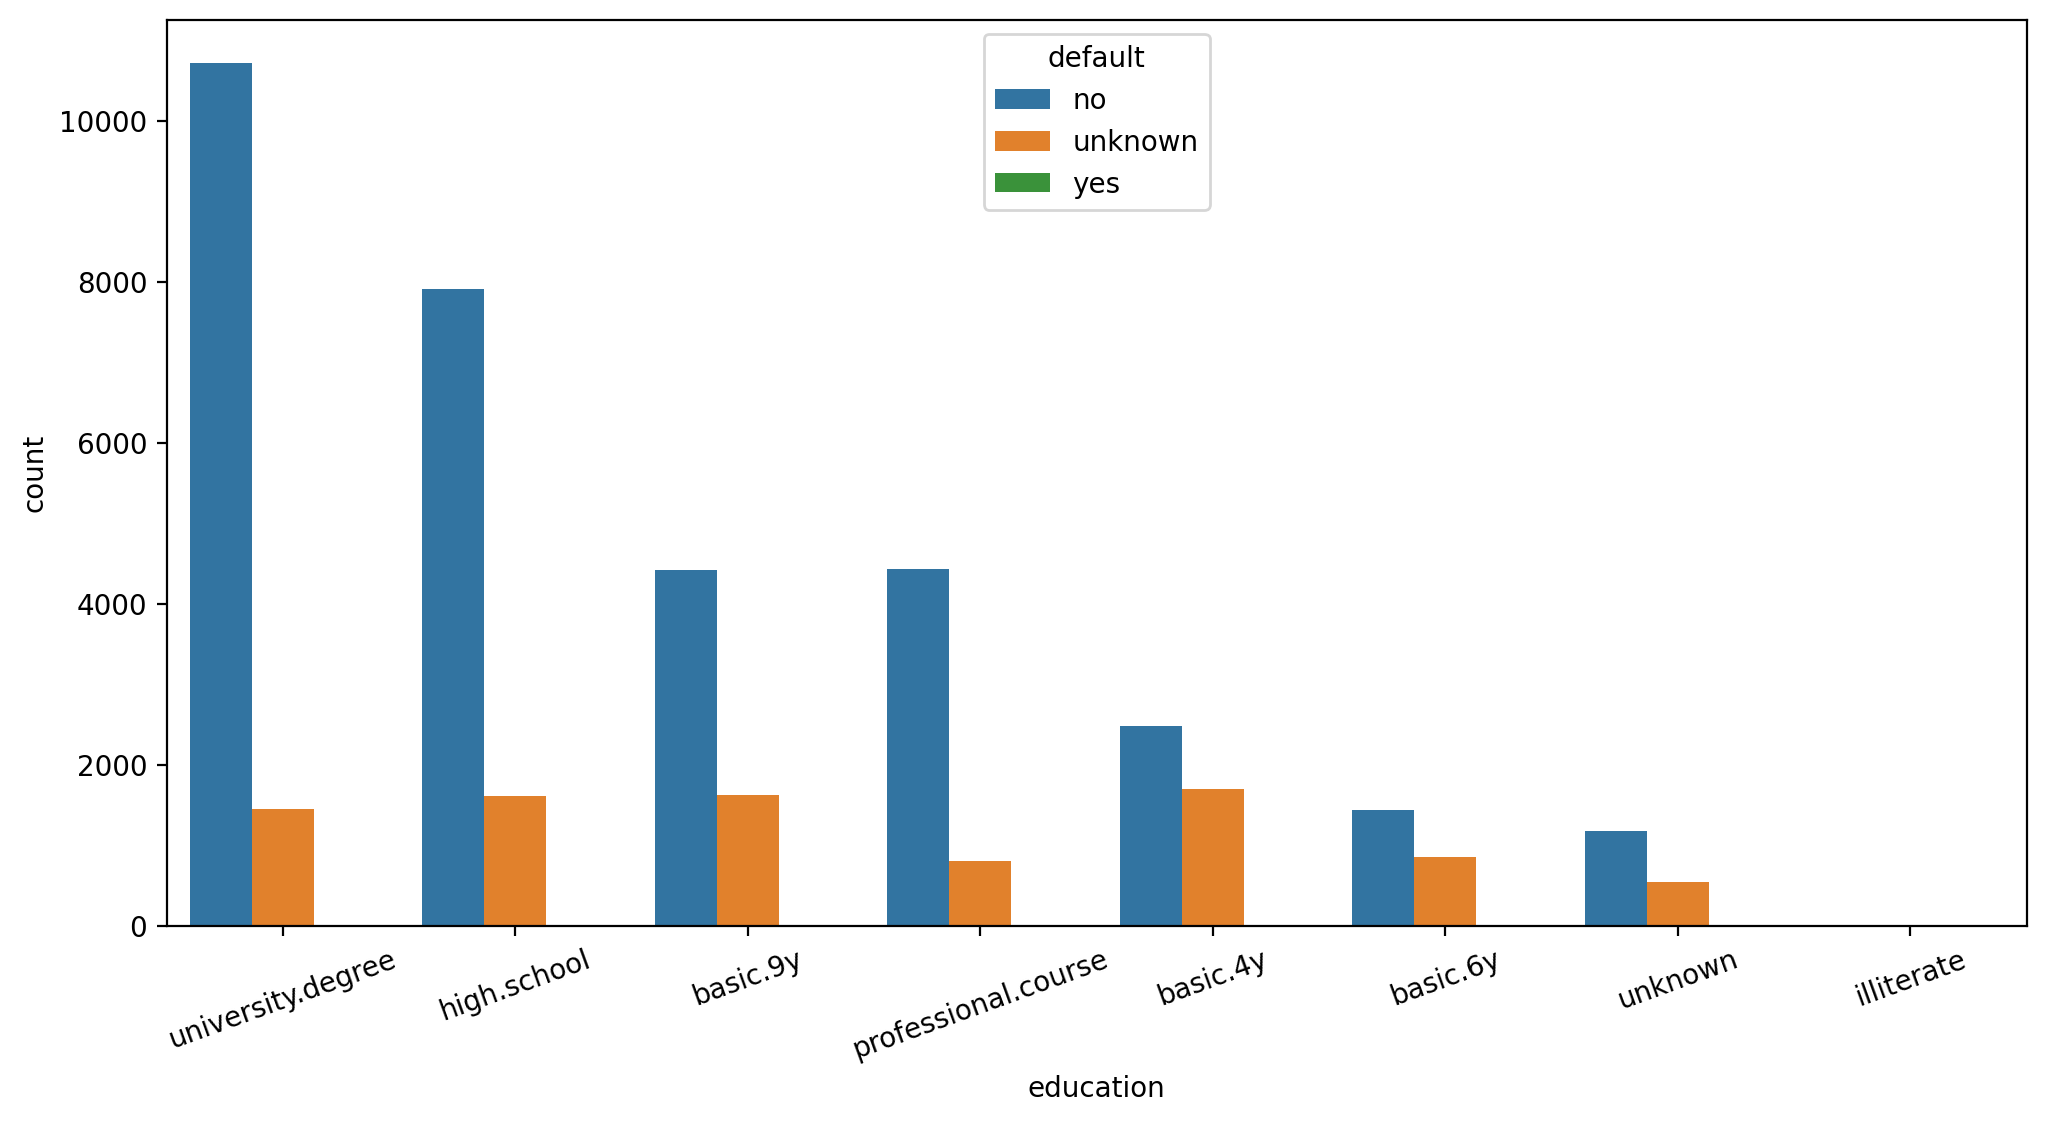

In [30]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x="education", order=df["education"].value_counts().index, hue="default") 
plt.xticks(rotation=20);

In [31]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [32]:
df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [33]:
# Data Preparation and modelling

In [34]:
X = pd.get_dummies(df)

In [35]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaled_x = scaler.fit_transform(X)

In [39]:
from sklearn.cluster import KMeans

In [40]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [41]:
# Initiate a model with 2 groups (people to market and not to market) as a starting point
model = KMeans(n_clusters=2)

In [42]:
# fit_transform -> same idea, fits and predicts the clusters
cluster_labels = model.fit_predict(scaled_x)

In [43]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
X["Cluster"] = cluster_labels

In [45]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1


In [51]:
# Correlation between features and cluster assignment
X.corr()["Cluster"].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

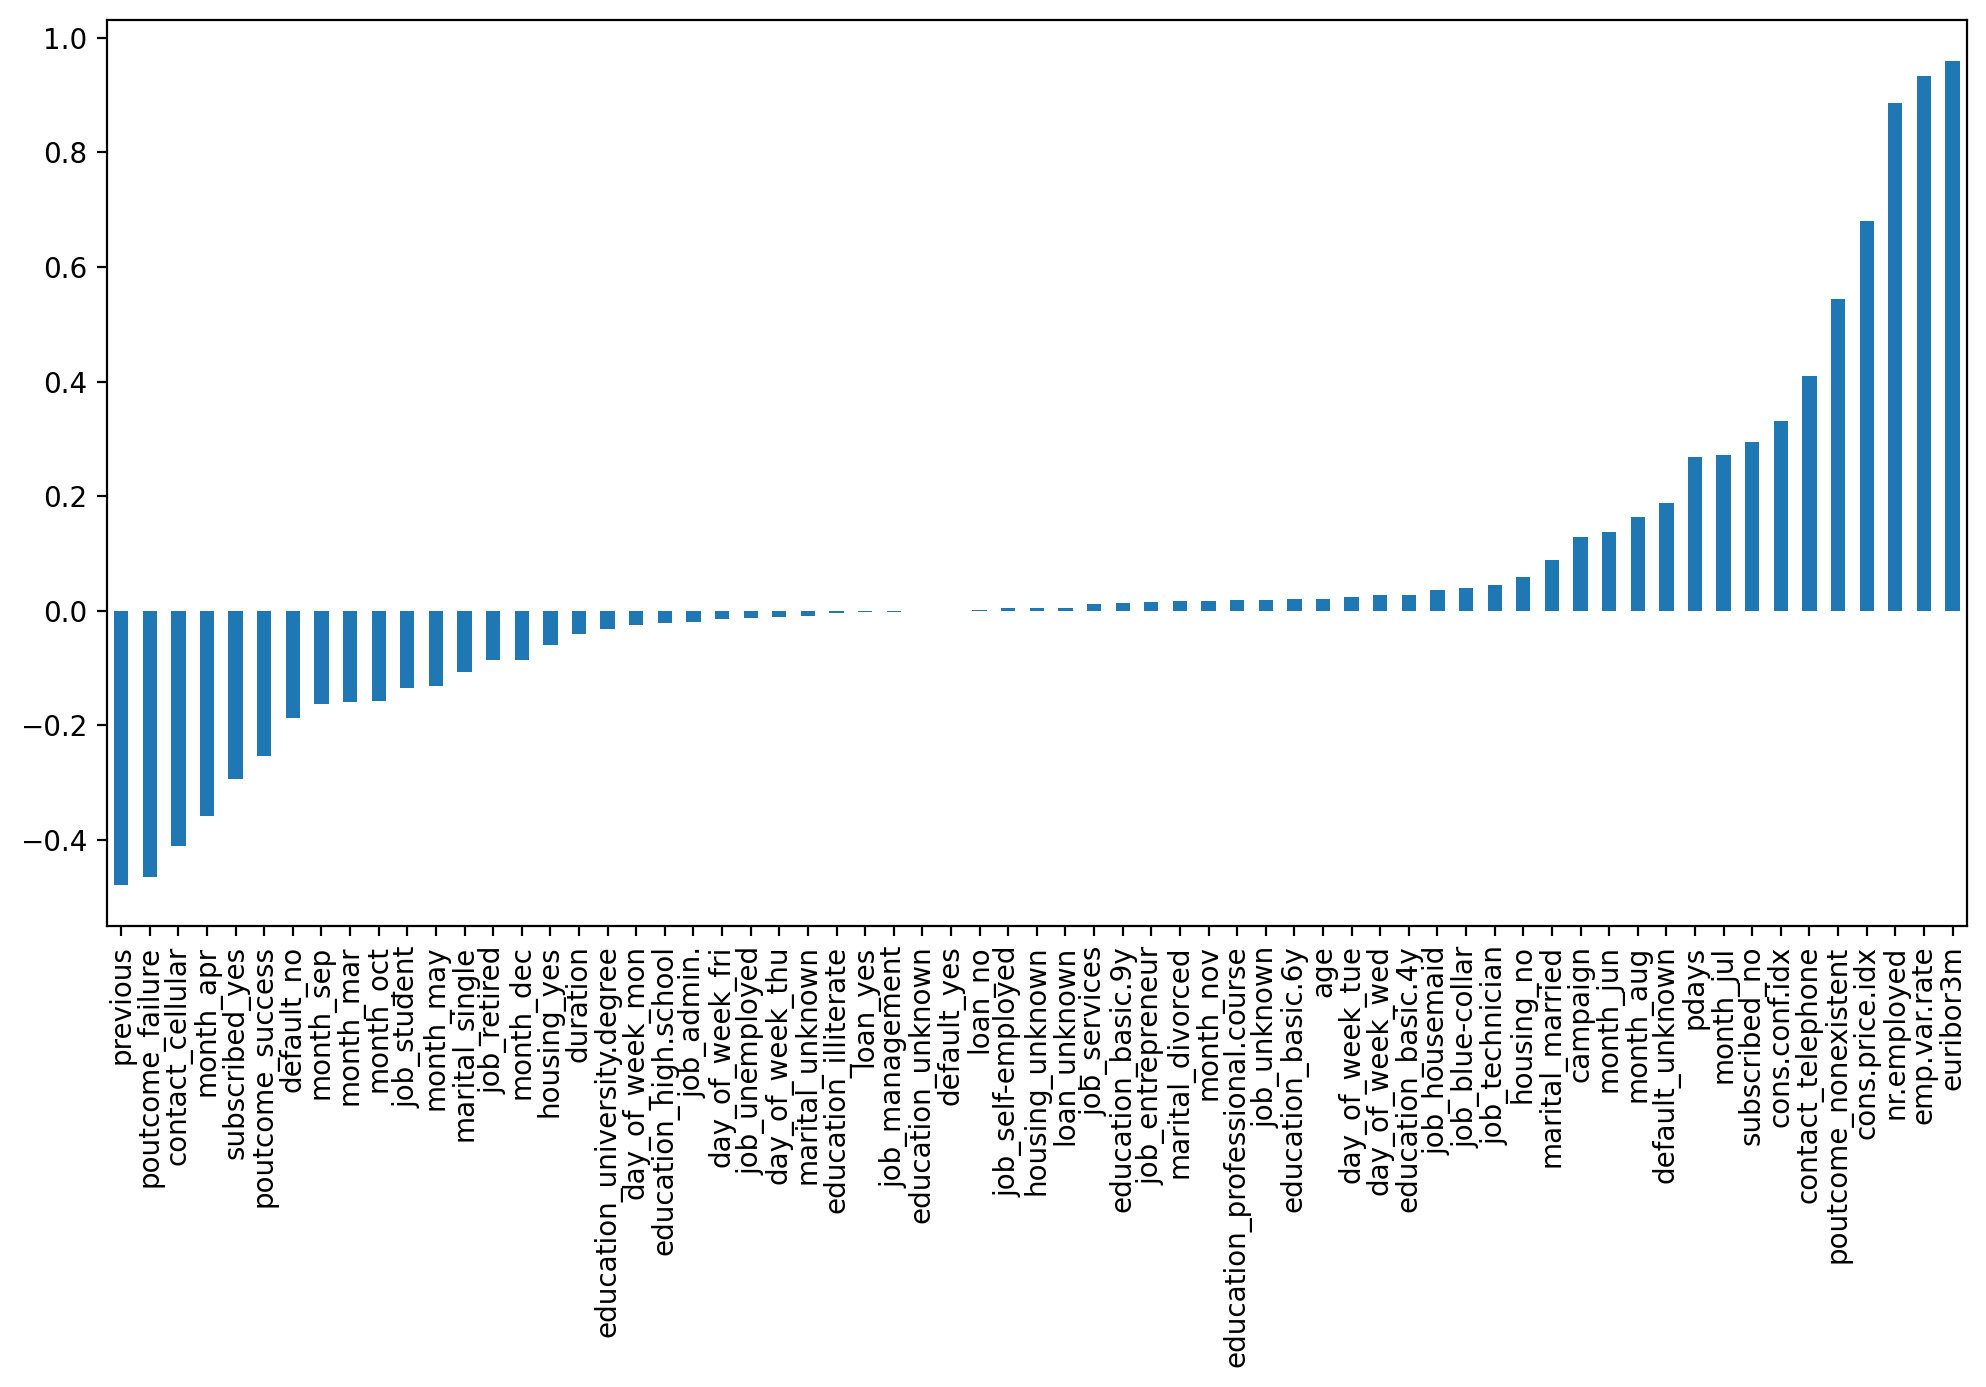

In [54]:
plt.figure(figsize=(12,6), dpi=200)
X.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.xticks(rotation=90);

With these correlation values we can observe which features are important for cluster assignment. Furthermore, this should be analyzed with experts in order to attain what each cluster might represent.

### "goodness of fit"

**Sum of squared distances**

We iterate with k+n until k is equal to the number of points. At this point the ssd is 0. The objective is to find when the ssd flattens. **Elbow method**


In [55]:
ssd = []

for k in range(2, 10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    
    ssd.append(model.inertia_) # Sum of squared distances of point -> cluster center

In [62]:
ssd

[2469792.390182287,
 2370786.6354607143,
 2271503.247450984,
 2200697.0900095026,
 2157695.2207741216,
 2101199.0294812075,
 2048334.7978866226,
 1991569.0507834558]

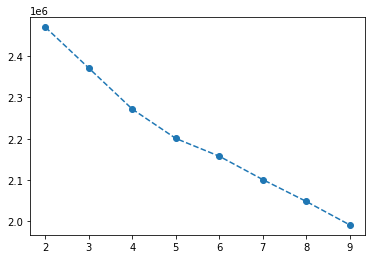

In [64]:
plt.plot(range(2,10), ssd, "o--");

In [65]:
pd.Series(ssd).diff()

0             NaN
1   -99005.754722
2   -99283.388010
3   -70806.157441
4   -43001.869235
5   -56496.191293
6   -52864.231595
7   -56765.747103
dtype: float64